# PROJECT: Forecasting System Retail - Data Explaration (Store 2)

# 1. MYSQL Connection

In [1]:
#CORPORATE CONFIDENTIAL DATASET
#CONFIDENTIAL ACCESS DATA
# MySQL connection
import pymysql
db_connection = pymysql.connect(host='xxx.x.xxx.xxx',
                                user='xxxxxx',
                                password='xxxxx',
                                database='xxxx')
# Create to Cursor Object
cursor = db_connection.cursor()

# 2. Initial Formatting of Jupyter Notebook

In [2]:
import pandas as pd
store_2=pd.read_sql('select * from store_2',db_connection)

In [3]:
store_2.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,STORE_KEY,SKU_KEY,REL_DAY,SLS_VAL,SLS_QTY,COST_SLS_VAL,SOH_QTY,SOH_VAL,MERCH_L2_KEY,MERCH_L3_KEY,MERCH_L4_KEY,MERCH_L5_KEY,PACKAGE_SIZE,PACKAGE_NO_UNITS
count,2868737.0,2868737.0,2868737.0,2868737.0,2868737.0,2868737.0,2868737.0,2868737.0,2868737.0,2868737.0,2868737.0,2868737.0,2868737.0,2868737.0
mean,2.0,13519.6,2859.7,45.4,7.4,29.5,82.2,285.3,2.8,10.9,251.2,1002.0,2008266.3,10.0
std,0.0,9291.4,208.2,134.2,22.7,106.9,238.5,854.2,0.4,14.7,476.6,563.2,3564217.5,0.0
min,2.0,1.0,2505.0,0.0,0.0,-27.0,-3024.0,-11041.0,2.0,4.0,17.0,283.0,300.0,10.0
25%,2.0,4851.0,2676.0,8.0,1.0,4.0,11.0,43.0,3.0,8.0,88.0,563.0,20000.0,10.0
50%,2.0,12331.0,2862.0,17.0,2.0,9.0,30.0,101.0,3.0,12.0,121.0,756.0,1000000.0,10.0
75%,2.0,22903.0,3038.0,37.0,6.0,20.0,75.0,233.0,3.0,13.0,182.0,1423.0,3000000.0,10.0
max,2.0,30884.0,3222.0,13778.0,4865.0,28461.0,14045.0,69379.0,3.0,2316.0,2318.0,2340.0,79200000.0,10.0


# 3. Data cleaning & Transformation

In [3]:
# DROP IRRELEVANT CUMMNS
df = store_2.drop(['STORE_KEY',
                   'REL_DAY',
                   'MERCH_L2_KEY',
                   'MERCH_L3_KEY',
                   'MERCH_L4_KEY',
                   'MERCH_L5_KEY',
                   'PACKAGE_NO_UNITS'],
                   axis=1)

In [9]:
# replace negative values ​​of soh_qty with zero
# df.at [df ['soh_qty'] <0] .index, 'soh_qty'] = 0
# Eliminate lines from Cost_SLS_VAL with negative values ​​and zeros
df.drop(df[df['COST_SLS_VAL']<=0].index, inplace=True)
# eliminate SOH_VAL lines with negative values ​​and zeros
df.drop(df[df['SOH_VAL']<=0].index, inplace=True)
# Eliminate SLS_QTY lines with zero values
df.drop(df[df['SLS_QTY']==0].index, inplace=True)
# Eliminate SLS_VAL lines with zero values
df.drop(df[df['SLS_VAL']==0].index, inplace=True)

In [11]:
df.shape

(2681613, 15)

In [12]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,SKU_KEY,SLS_VAL,SLS_QTY,COST_SLS_VAL,SOH_QTY,SOH_VAL,PACKAGE_SIZE
count,2681613.0,2681613.0,2681613.0,2681613.0,2681613.0,2681613.0,2681613.0
mean,13526.0,42.6,7.5,27.6,88.3,305.1,1903593.7
std,9169.3,121.4,22.9,97.2,244.9,877.3,2463610.0
min,1.0,1.0,1.0,1.0,0.0,1.0,300.0
25%,5070.0,8.0,1.0,4.0,14.0,51.0,50000.0
50%,12167.0,17.0,2.0,9.0,33.0,110.0,1000000.0
75%,22806.0,36.0,6.0,20.0,80.0,247.0,3200000.0
max,30884.0,12622.0,4865.0,28461.0,14045.0,69378.0,63000000.0


In [13]:
# DROP IRRELEVANT CUMMNS
df = store_2.drop(['COST_SLS_VAL',
                   'SOH_QTY',
                   'SOH_VAL'],
                   axis=1)

In [14]:
# add new columns from day_date
df['YEAR']=df['DAY_DATE'].dt.year
df['MONTH']=df['DAY_DATE'].dt.month_name()
df['WEEKDAY']=df['DAY_DATE'].dt.day_name()

In [15]:
df = df.set_index('DAY_DATE')

# 4. Visualization

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [18, 10]})   # width = 15, height = 6
# plt.legend (loc = 2, prop = {'size': 12});

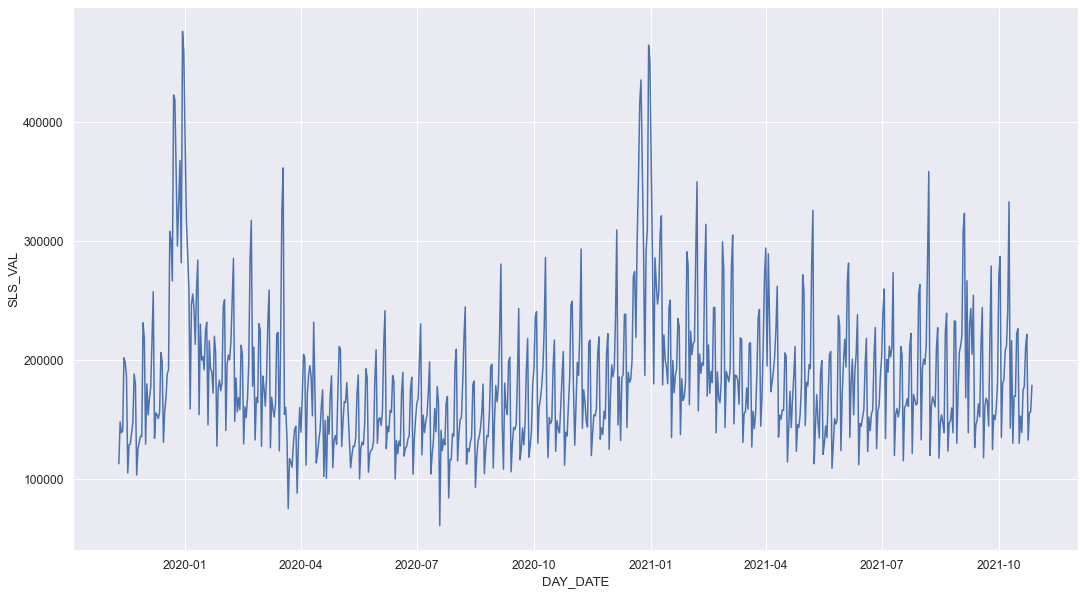

In [17]:
df_aux = df.groupby(['DAY_DATE'])['SLS_VAL'].sum().reset_index()
sns.lineplot(data=df_aux,x='DAY_DATE',y='SLS_VAL');

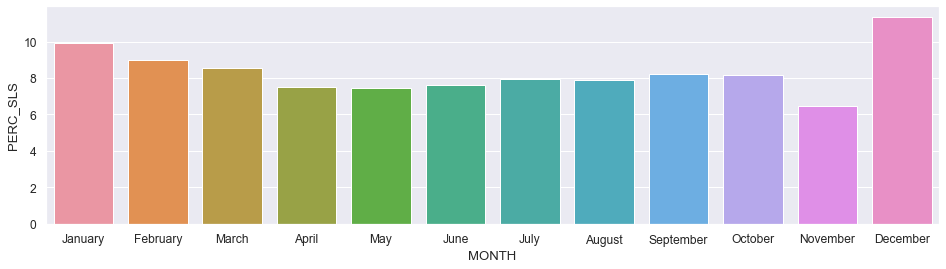

In [19]:
df_aux = df.groupby('MONTH')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux['PERC_SLS']=(df_aux['SLS_VAL']/sum(df_aux['SLS_VAL']))*100

sns.barplot(x='MONTH', y='PERC_SLS', data=df_aux, order=['January','February','March','April','May','June','July','August','September','October','November','December']);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [14,4]})

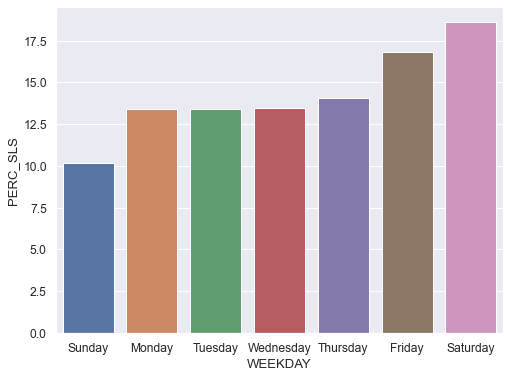

In [21]:
df_aux = df.groupby('WEEKDAY')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux['PERC_SLS']=(df_aux['SLS_VAL']/sum(df_aux['SLS_VAL']))*100

sns.barplot(x='WEEKDAY', y='PERC_SLS', data=df_aux, order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [6,6]})

## Year: 2019

In [22]:
df_19 = df[df['YEAR']==2019]     # From November 10th

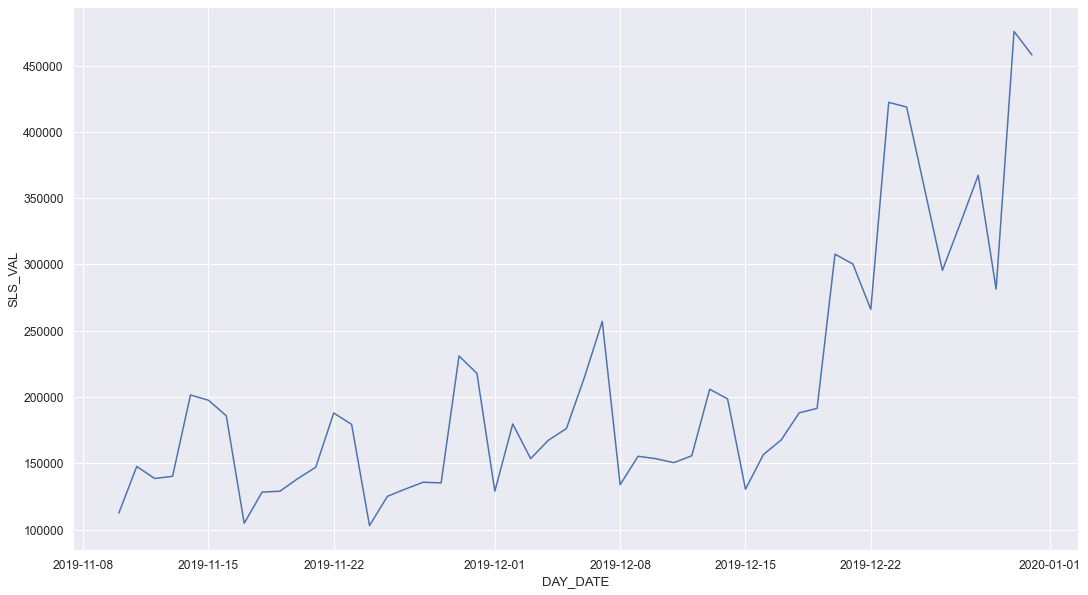

In [24]:
df_aux = df_19.groupby('DAY_DATE')['SLS_VAL'].sum().reset_index()

sns.lineplot(data=df_aux,x='DAY_DATE',y='SLS_VAL');
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [18, 10]})

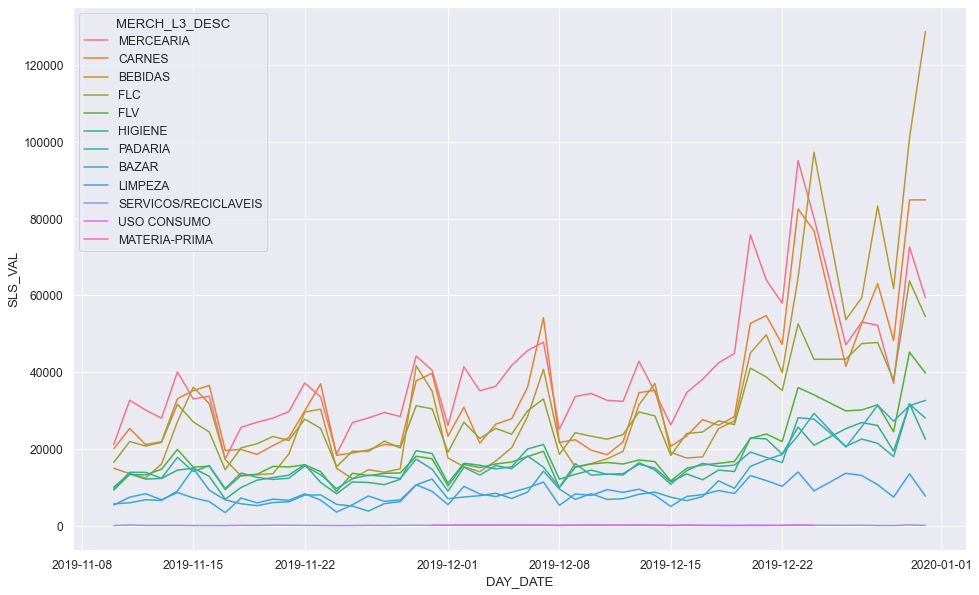

In [47]:
df_aux1 = df_19.groupby(['DAY_DATE','MERCH_L3_DESC'])['SLS_VAL'].sum().reset_index()
df_aux2 = df_aux1.groupby('MERCH_L3_DESC')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)

sns.lineplot(data=df_aux1,x='DAY_DATE',y='SLS_VAL',hue='MERCH_L3_DESC',hue_order=df_aux2['MERCH_L3_DESC']);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [18, 10]})

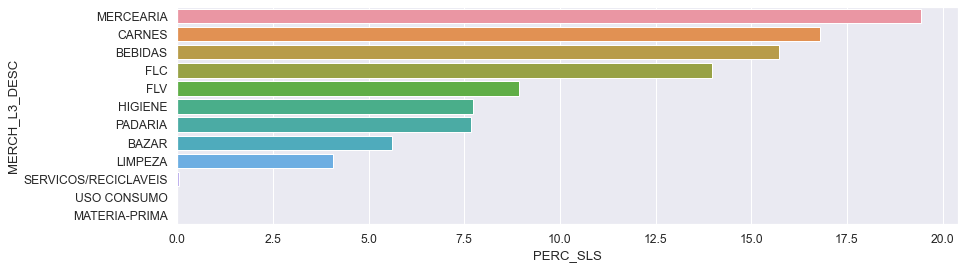

In [88]:
df_aux = df_19.groupby('MERCH_L3_DESC')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux['PERC_SLS']=(df_aux['SLS_VAL']/sum(df_aux['SLS_VAL']))*100

sns.barplot(x='PERC_SLS', y='MERCH_L3_DESC', data=df_aux, order=df_aux.sort_values(by='PERC_SLS',ascending=False).MERCH_L3_DESC);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [14, 4]})

### Month

In [116]:
df_aux = df_19.groupby('MONTH')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux['PERC_SLS']=(df_aux['SLS_VAL']/sum(df_aux['SLS_VAL']))*100
df_aux

,MONTH,SLS_VAL,PERC_SLS
0,December,7189476,69.082123
1,November,3217668,30.917877


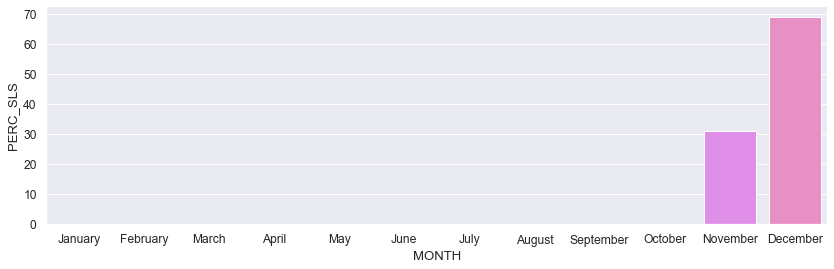

In [117]:
sns.barplot(x='MONTH', y='PERC_SLS', data=df_aux, order=['January','February','March','April','May', 'June','July','August','September','October','November','December']);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [14,4]})

In [50]:
df_aux = df_19[df_19['MONTH']=='December'].groupby('MERCH_L3_DESC')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux['PERC_SLS']=(df_aux['SLS_VAL']/sum(df_aux['SLS_VAL']))*100
df_aux

,MERCH_L3_DESC,SLS_VAL,PERC_SLS
8,MERCEARIA,1390293,19.337891
2,CARNES,1209030,16.816664
1,BEBIDAS,1202899,16.731386
3,FLC,976899,13.587903
4,FLV,633461,8.810948
5,HIGIENE,539841,7.508767
9,PADARIA,521848,7.258498
0,BAZAR,431457,6.001230
6,LIMPEZA,280363,3.899631
10,SERVICOS/RECICLAVEIS,2915,0.040545


### Weekday

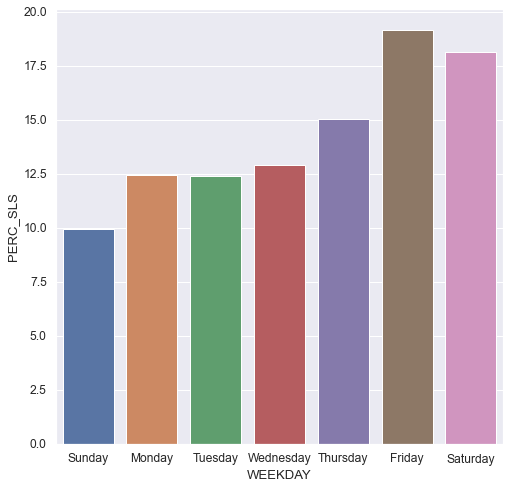

In [57]:
df_aux = df_19[df_19['MONTH']=='November'].groupby('WEEKDAY')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux['PERC_SLS']=(df_aux['SLS_VAL']/sum(df_aux['SLS_VAL']))*100

sns.barplot(x='WEEKDAY', y='PERC_SLS', data=df_aux, order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [8,8]})

## Year: 2020

In [58]:
df_20 = df[df['YEAR']==2020]

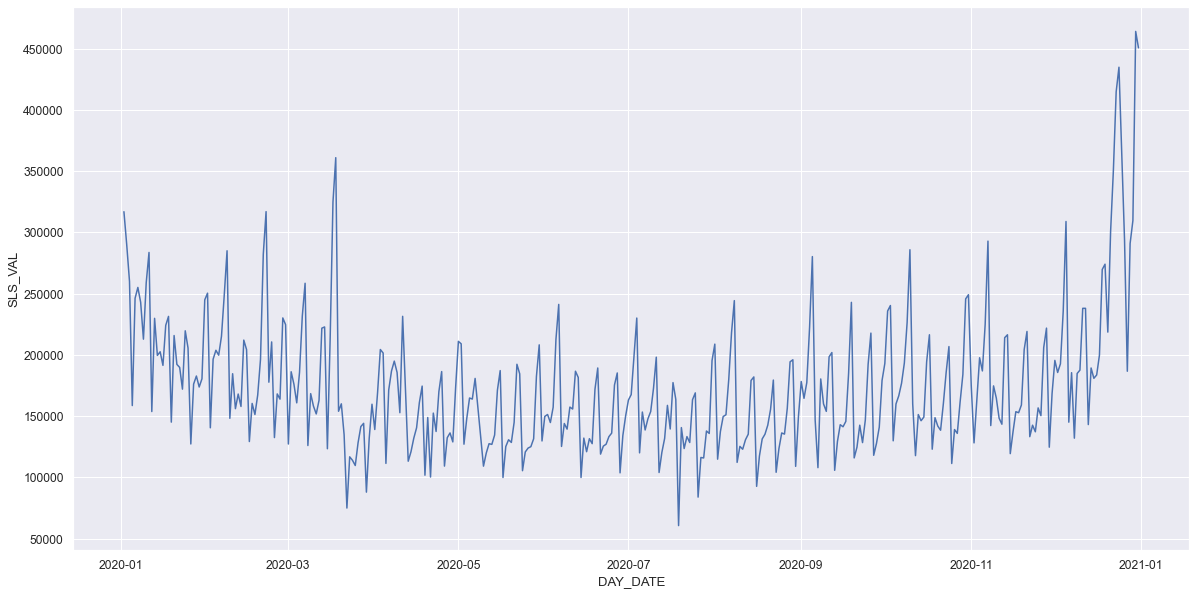

In [60]:
df_aux = df_20.groupby('DAY_DATE')['SLS_VAL'].sum().reset_index()

sns.lineplot(data=df_aux,x='DAY_DATE',y='SLS_VAL');
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [20, 10]})

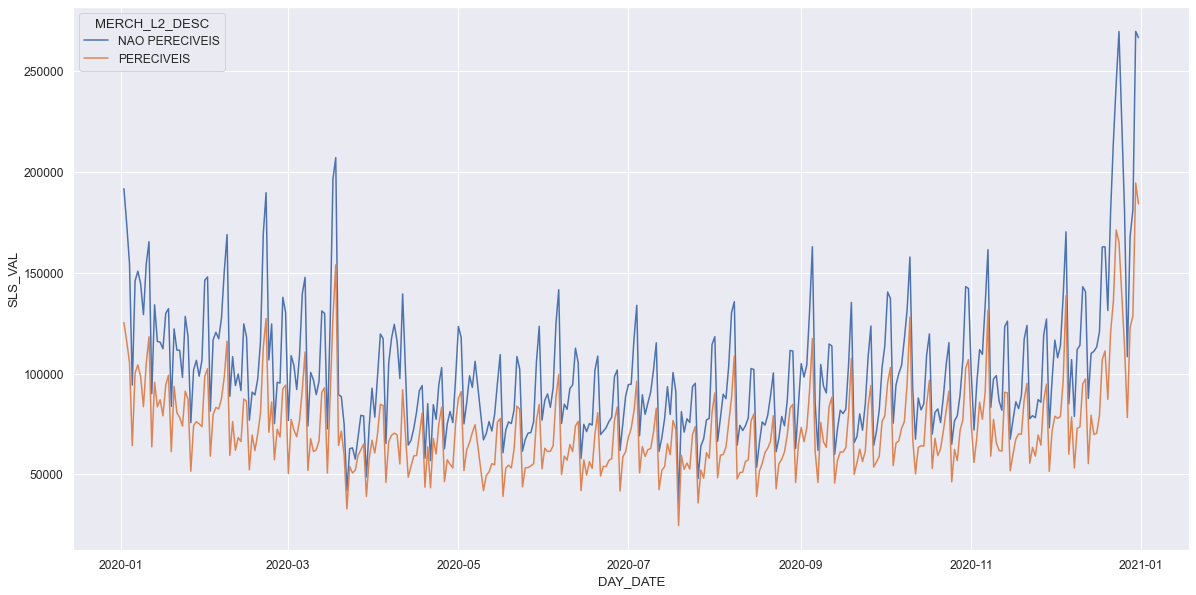

In [61]:
df_aux1 = df_20.groupby(['DAY_DATE','MERCH_L2_DESC'])['SLS_VAL'].sum().reset_index()
df_aux2 = df_aux1.groupby('MERCH_L2_DESC')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)

sns.lineplot(data=df_aux1,x='DAY_DATE',y='SLS_VAL',hue='MERCH_L2_DESC',hue_order=df_aux2['MERCH_L2_DESC']);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [16, 10]})

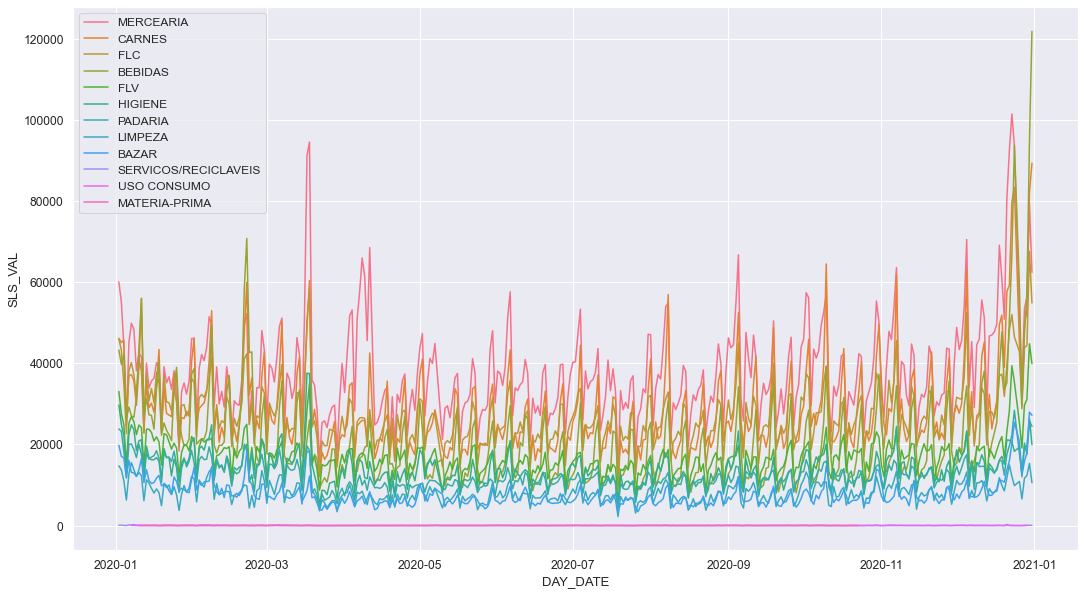

In [63]:
df_aux1 = df_20.groupby(['DAY_DATE','MERCH_L3_DESC'])['SLS_VAL'].sum().reset_index()
df_aux2 = df_aux1.groupby('MERCH_L3_DESC')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)

sns.lineplot(data=df_aux1,x='DAY_DATE',y='SLS_VAL',hue='MERCH_L3_DESC',hue_order=df_aux2['MERCH_L3_DESC']);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [18, 10]})
plt.legend(loc=2, prop={'size': 12});

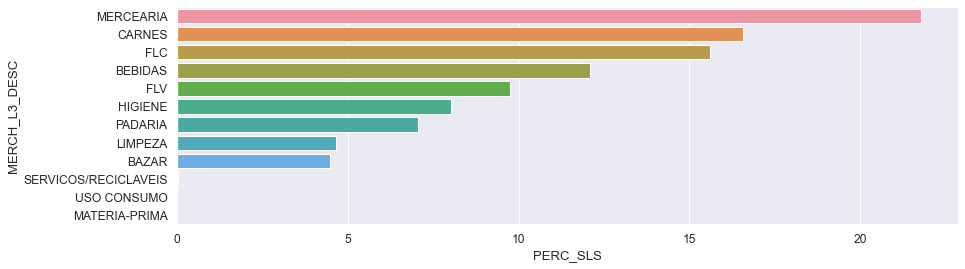

In [87]:
df_aux = df_20.groupby('MERCH_L3_DESC')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux['PERC_SLS']=(df_aux['SLS_VAL']/sum(df_aux['SLS_VAL']))*100

sns.barplot(x='PERC_SLS', y='MERCH_L3_DESC', data=df_aux, order=df_aux.sort_values(by='PERC_SLS',ascending=False).MERCH_L3_DESC);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [14, 4]})

### Month

In [113]:
df_aux = df_20.groupby('MONTH')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux['PERC_SLS']=(df_aux['SLS_VAL']/sum(df_aux['SLS_VAL']))*100
df_aux

,MONTH,SLS_VAL,PERC_SLS
2,December,7586190,12.062355
4,January,6383966,10.150770
3,February,5682948,9.036122
10,October,5474992,8.705463
7,March,5218499,8.297629
9,November,5159997,8.204608
11,September,4899426,7.790290
1,August,4650528,7.394532
5,July,4543103,7.223721
6,June,4509740,7.170673


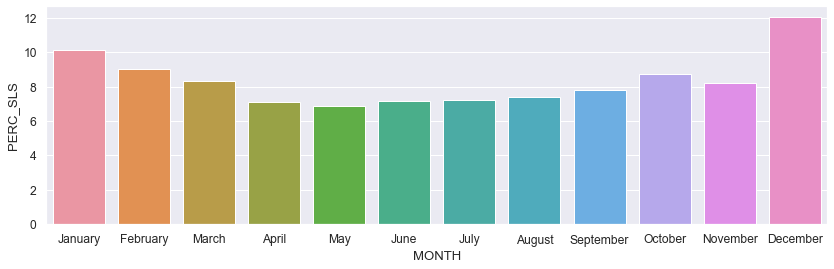

In [115]:
sns.barplot(x='MONTH', y='PERC_SLS', data=df_aux, order=['January','February','March','April','May', 'June','July','August','September','October','November','December']);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [14,4]})

In [85]:
df_aux = df_20[df_20['MONTH']=='December'].groupby('MERCH_L3_DESC')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux['PERC_SLS']=(df_aux['SLS_VAL']/sum(df_aux['SLS_VAL']))*100
df_aux

,MERCH_L3_DESC,SLS_VAL,PERC_SLS
7,MERCEARIA,1676362,22.097548
2,CARNES,1321189,17.415712
1,BEBIDAS,1160132,15.292683
3,FLC,1082537,14.269838
4,FLV,672205,8.860904
5,HIGIENE,509101,6.710892
8,PADARIA,484701,6.389255
0,BAZAR,370751,4.887183
6,LIMPEZA,307193,4.049371
9,SERVICOS/RECICLAVEIS,1582,0.020854


### Weekday

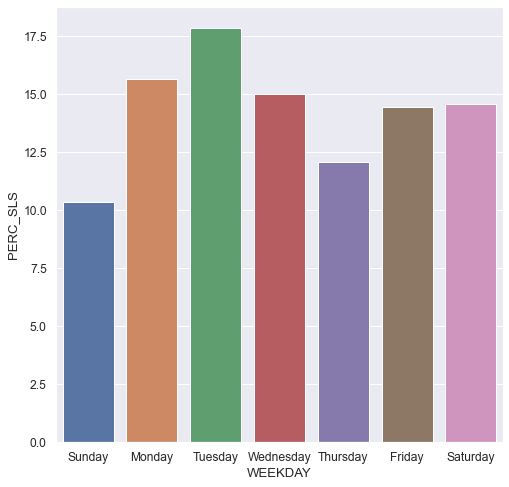

In [93]:
df_aux = df_20[df_20['MONTH']=='March'].groupby('WEEKDAY')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux['PERC_SLS']=(df_aux['SLS_VAL']/sum(df_aux['SLS_VAL']))*100

sns.barplot(x='WEEKDAY', y='PERC_SLS', data=df_aux, order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [8,8]})

## Year: 2021

In [95]:
df_21 = df[df['YEAR']==2021]

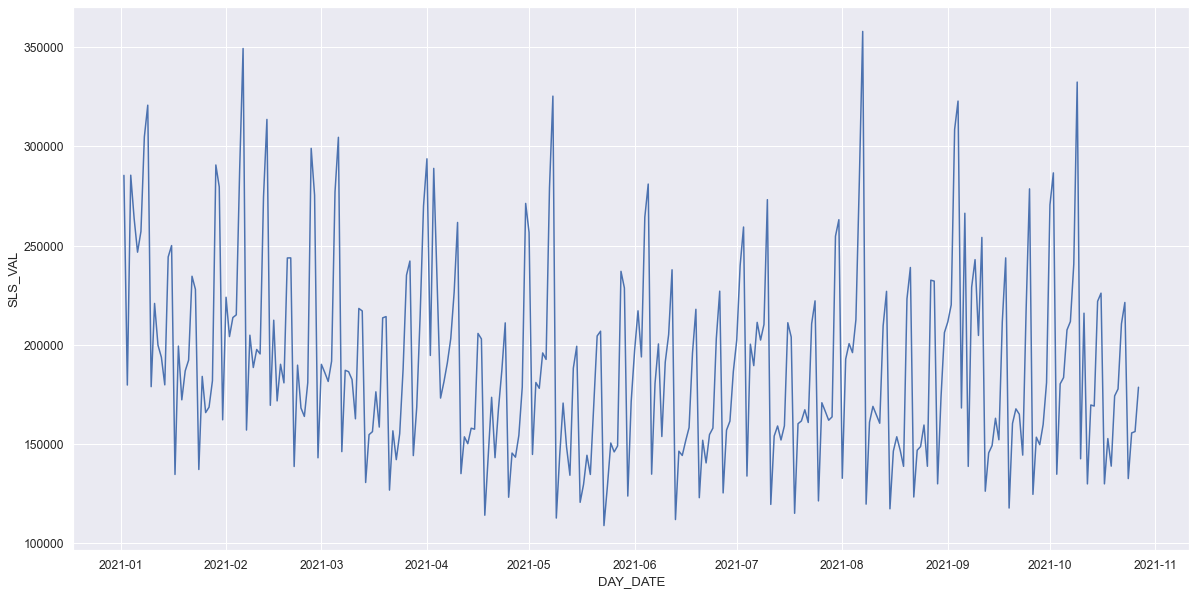

In [97]:
df_aux = df_21.groupby('DAY_DATE')['SLS_VAL'].sum().reset_index()

sns.lineplot(data=df_aux,x='DAY_DATE',y='SLS_VAL');
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [20, 10]})

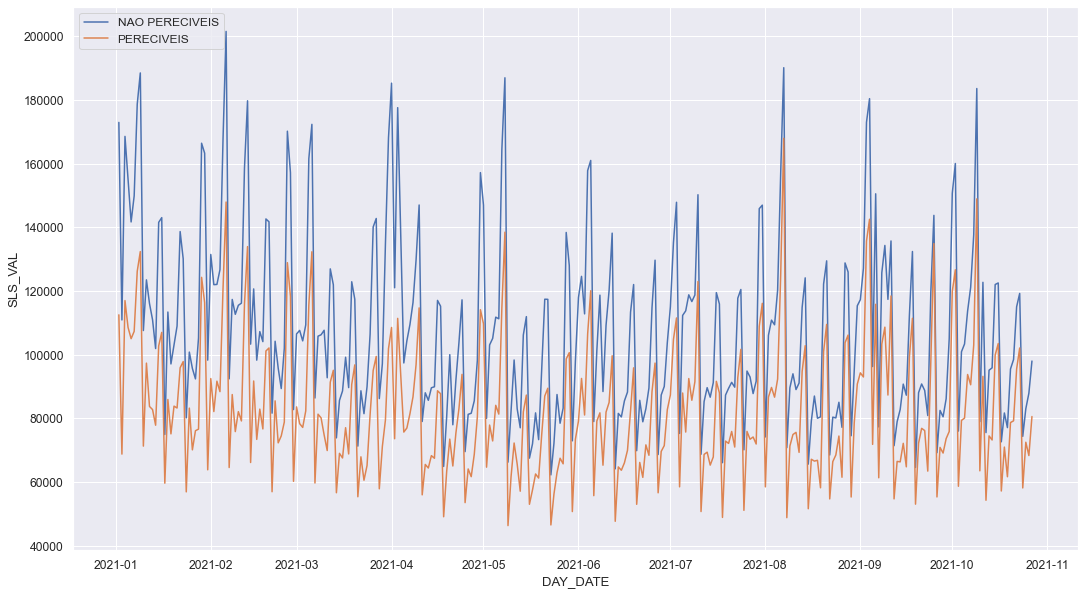

In [100]:
df_aux1 = df_21.groupby(['DAY_DATE','MERCH_L2_DESC'])['SLS_VAL'].sum().reset_index()
df_aux2 = df_aux1.groupby('MERCH_L2_DESC')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)

sns.lineplot(data=df_aux1,x='DAY_DATE',y='SLS_VAL',hue='MERCH_L2_DESC',hue_order=df_aux2['MERCH_L2_DESC']);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [16, 10]})
plt.legend(loc=2, prop={'size': 12});

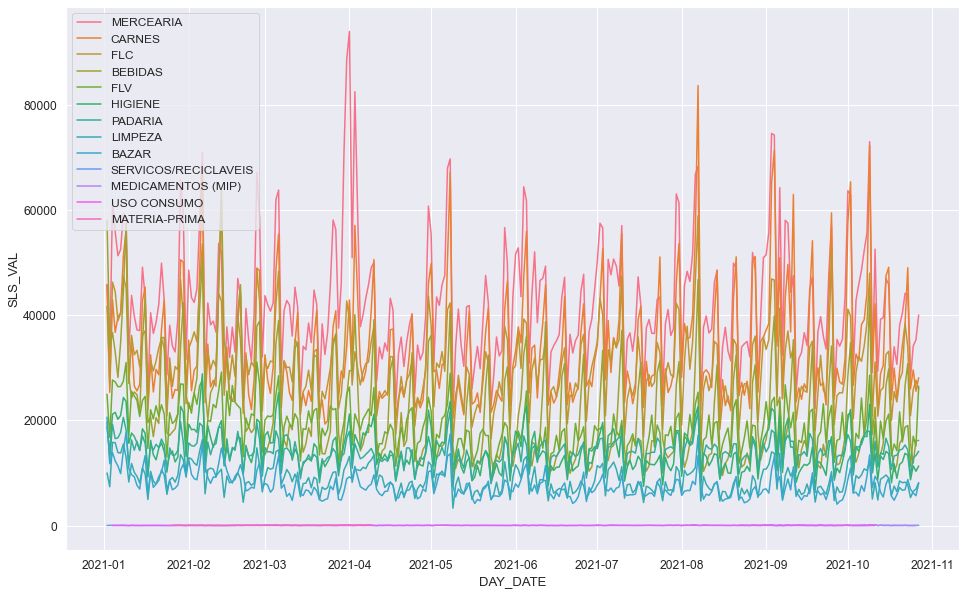

In [101]:
df_aux1 = df_21.groupby(['DAY_DATE','MERCH_L3_DESC'])['SLS_VAL'].sum().reset_index()
df_aux2 = df_aux1.groupby('MERCH_L3_DESC')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)

sns.lineplot(data=df_aux1,x='DAY_DATE',y='SLS_VAL',hue='MERCH_L3_DESC',hue_order=df_aux2['MERCH_L3_DESC']);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [18, 10]})
plt.legend(loc=2, prop={'size': 12});

In [ ]:
df_aux = df_21.groupby('MERCH_L3_DESC')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux['PERC_SLS']=(df_aux['SLS_VAL']/sum(df_aux['SLS_VAL']))*100

sns.barplot(x='PERC_SLS', y='MERCH_L3_DESC', data=df_aux, order=df_aux.sort_values(by='PERC_SLS',ascending=False).MERCH_L3_DESC);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [14, 4]})

### Month

In [106]:
df_aux = df_21.groupby('MONTH')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux['PERC_SLS']=(df_aux['SLS_VAL']/sum(df_aux['SLS_VAL']))*100
df_aux      # Until 27 October

,MONTH,SLS_VAL,PERC_SLS
3,January,6527478,11.482241
2,February,5996083,10.547484
6,March,5875829,10.335950
4,July,5778808,10.165284
9,September,5776361,10.160979
1,August,5640155,9.921385
7,May,5403109,9.504406
5,June,5369476,9.445243
0,April,5331566,9.378557
8,October,5149602,9.058471


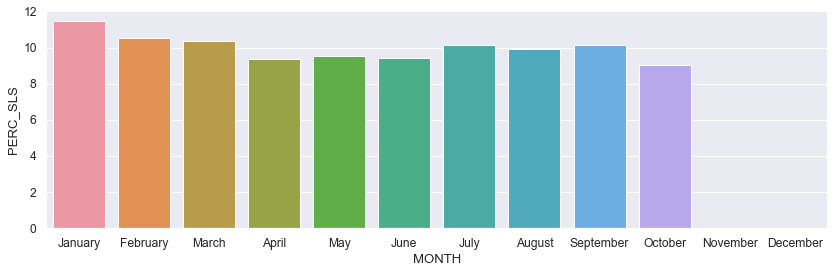

In [107]:
sns.barplot(x='MONTH', y='PERC_SLS', data=df_aux, order=['January','February','March','April','May', 'June','July','August','September','October','November','December']);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [14,4]})

In [109]:
df_aux = df_21[df_21['MONTH']=='January'].groupby('MERCH_L3_DESC')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux['PERC_SLS']=(df_aux['SLS_VAL']/sum(df_aux['SLS_VAL']))*100
df_aux

,MERCH_L3_DESC,SLS_VAL,PERC_SLS
8,MERCEARIA,1305457,19.999409
2,CARNES,1042611,15.972647
3,FLC,1029183,15.766932
1,BEBIDAS,891109,13.651658
4,FLV,677032,10.372030
5,HIGIENE,497655,7.624001
9,PADARIA,459539,7.040070
0,BAZAR,312689,4.790349
6,LIMPEZA,310980,4.764168
10,SERVICOS/RECICLAVEIS,1140,0.017465


### Weekday

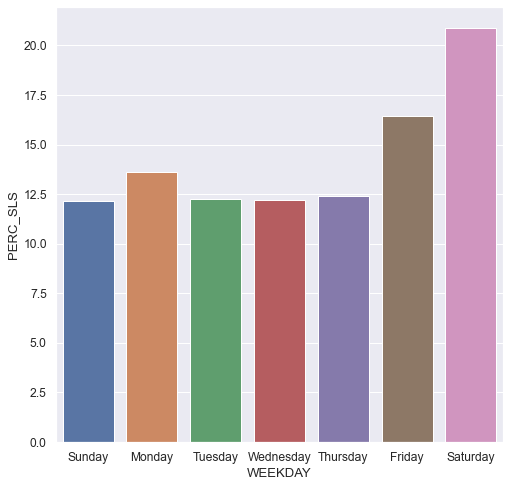

In [111]:
df_aux = df_21[df_21['MONTH']=='January'].groupby('WEEKDAY')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux['PERC_SLS']=(df_aux['SLS_VAL']/sum(df_aux['SLS_VAL']))*100

sns.barplot(x='WEEKDAY', y='PERC_SLS', data=df_aux, order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']);
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [8,8]})

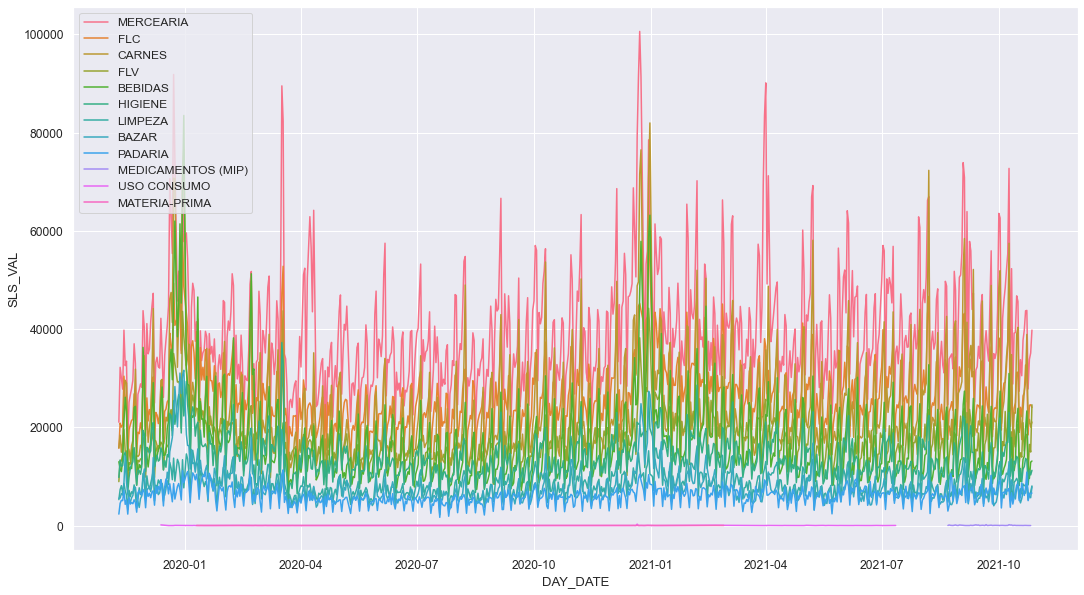

In [51]:
df_aux = df.groupby(['DAY_DATE','MERCH_L3_DESC'])['SLS_VAL'].sum().reset_index()
sns.lineplot(data=df_aux,x='DAY_DATE',y='SLS_VAL',hue='MERCH_L3_DESC',hue_order=list(df_aux1['MERCH_L3_DESC']));
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [18, 10]})

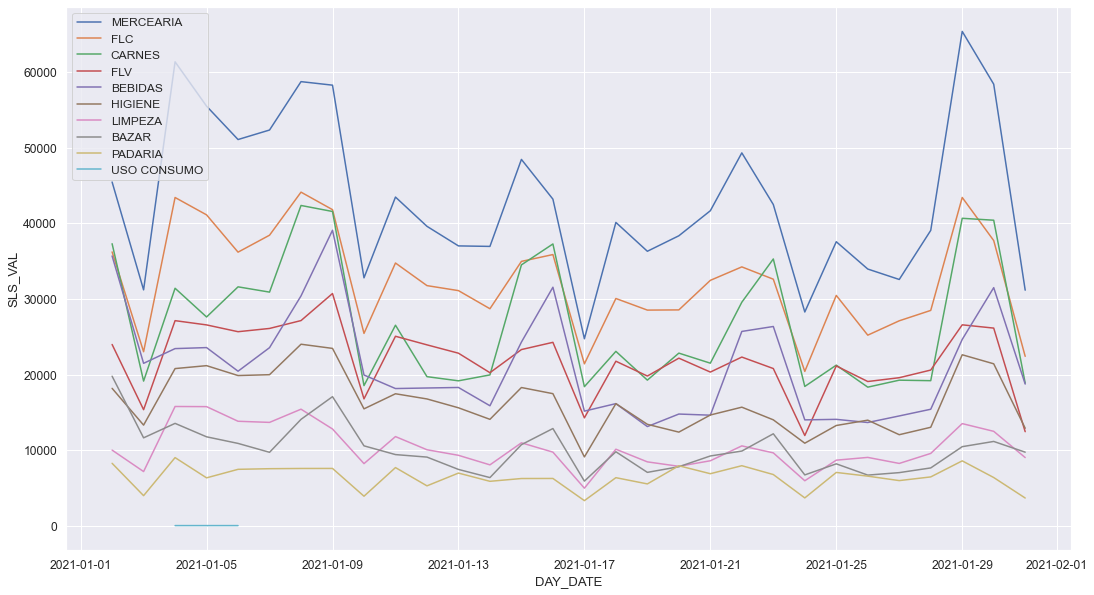

In [77]:
df_aux = df[(df['YEAR']==2021) & (df['MONTH']=='January')]
df_aux1 = df_aux.groupby('MERCH_L3_DESC')['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)

df_aux = df_aux.groupby(['DAY_DATE','WEEKDAY','MERCH_L3_DESC'])['SLS_VAL'].sum().reset_index()
sns.lineplot(data=df_aux,x='DAY_DATE',y='SLS_VAL',hue='MERCH_L3_DESC',hue_order=list(df_aux1['MERCH_L3_DESC']));
sns.set(style='darkgrid', font_scale=1.1, rc={"figure.figsize": [18, 10]})
plt.legend(loc=2, prop={'size': 12});

In [65]:
df_aux1 = df.groupby(['MERCH_L3_DESC','MERCH_L4_DESC'])['SLS_VAL'].sum().reset_index().sort_values(by='SLS_VAL',ascending=False)
df_aux1['PERC_SLS']=(df_aux1['SLS_VAL']/sum(df_aux1['SLS_VAL']))*100
df_aux1

,MERCH_L3_DESC,MERCH_L4_DESC,SLS_VAL,PERC_SLS
63,CARNES,CORTES FRANGO CONGELADO,5978441,5.221715
102,FLV,FRUTAS,5163629,4.510039
57,CARNES,CARNE BOVINA TRASEIRO,4496987,3.927777
94,FLC,QUEIJOS,4016369,3.507994
104,FLV,LEGUMES,3919526,3.423409
...,...,...,...,...
25,BAZAR,REVISTAS/JORNAL,960,0.000838
228,PADARIA,ROTISSERIA,831,0.000726
232,PADARIA,TORTAS INDUSTRIALIZADAS,165,0.000144
159,MATERIA-PRIMA,TERCEIRIZADA,95,0.000083
